In [75]:
import pandas as pd
import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [76]:
df = pd.read_csv('data/df.csv')
df_lin_int = pd.read_csv('data/df_linearly_interpolated.csv')

In [77]:
#method 1

In [78]:
# series_decomposedult = seasonal_decompose(df[param], model="additive", period=7)

In [79]:
#method 2

In [80]:
class DecompositionMonster:
    def __init__(self, param, df_to_interpolate):
        self.param = param
        self.series_decomposed = []
        self.missing_values_indieces = []
        self.df_stl_int = df_to_interpolate.copy()
    
    def decompose(self):
        self.missing_values_indieces = df[df[self.param].isnull()].index
        
        stl = STL(df_lin_int[self.param], period=24, seasonal=7)
        self.series_decomposed = stl.fit()
        self.series_decomposed.plot()
        
    def stl_interpolate(self):
        seasonal_component = self.series_decomposed.seasonal
        seasonal_component.isna().sum()
        series_deseasonalised = df[self.param] - seasonal_component
        series_deseasonalised_interpolated = series_deseasonalised.interpolate(method="linear")
        series_interpolated = series_deseasonalised_interpolated + seasonal_component
    
        # self.df_stl_int.loc[self.missing_values_indieces, self.param] = series_interpolated[self.missing_values_indieces]
        self.df_stl_int[self.param] = series_interpolated

    def comparison_plot_both(self):
        plt.figure(figsize=[12, 6])
        self.df_stl_int[self.param].plot(style='-', alpha=.5, color='red', label='STL series')
        df_lin_int[self.param].plot(style='-', alpha=.5, color='b', label='linear series')
        plt.scatter(self.missing_values_indieces, self.df_stl_int.loc[self.missing_values_indieces, self.param], color='red', label='STL filled values')
        plt.scatter(self.missing_values_indieces, df_lin_int.loc[self.missing_values_indieces, self.param], color='b', label='linear filled values')
        
        plt.title(self.param + " - STL and linear interpolation comparison")
        plt.ylabel(self.param)
        plt.xlabel("Time")
        plt.legend()
        plt.show()

    def comparison_plot_stl_only(self):
        plt.figure(figsize=[12, 6])
        self.df_stl_int[self.param].plot(style='-', alpha=.5, color='red', label='STL series')
        plt.scatter(self.missing_values_indieces, self.df_stl_int.loc[self.missing_values_indieces, self.param], color='red', label='STL filled values')
        plt.scatter(self.missing_values_indieces, df_lin_int.loc[self.missing_values_indieces, self.param], color='b', label='linear filled values')
        
        plt.title(self.param + " - STL and linear interpolation comparison")
        plt.ylabel(self.param)
        plt.xlabel("Time")
        plt.legend()
        plt.show()

In [81]:
# def decompose(param):
#     missing_values_indieces = df[df[param].isnull()].index
    
#     stl = STL(df_lin_int[param], period=24, seasonal=7)
#     series_decomposed = stl.fit()
#     series_decomposed.plot()

In [82]:
# def stl_interpolate(param):
#     seasonal_component = series_decomposed.seasonal
#     seasonal_component.isna().sum()
#     series_deseasonalised = df[param] - seasonal_component
#     series_deseasonalised_interpolated = series_deseasonalised.interpolate(method="linear")
#     series_interpolated = series_deseasonalised_interpolated + seasonal_component

#     # df_stl_int.loc[missing_values_indieces, param] = series_interpolated[missing_values_indieces]
#     df_stl_int[param] = series_interpolated

In [83]:
# def comparison_plot_both(param):
#     plt.figure(figsize=[12, 6])
#     df_stl_int[param].plot(style='-', alpha=.5, color='red', label='STL series')
#     df_lin_int[param].plot(style='-', alpha=.5, color='b', label='linear series')
#     plt.scatter(missing_values_indieces, df_stl_int.loc[missing_values_indieces, param], color='red', label='STL filled values')
#     plt.scatter(missing_values_indieces, df_lin_int.loc[missing_values_indieces, param], color='b', label='linear filled values')
    
#     plt.title(param + " - STL and linear interpolation comparison")
#     plt.ylabel(param)
#     plt.xlabel("Time")
#     plt.legend()
#     plt.show()

In [84]:
# def comparison_plot_stl_only(param):
#     plt.figure(figsize=[12, 6])
#     df_stl_int[param].plot(style='-', alpha=.5, color='red', label='STL series')
#     plt.scatter(missing_values_indieces, df_stl_int.loc[missing_values_indieces, param], color='red', label='STL filled values')
#     plt.scatter(missing_values_indieces, df_lin_int.loc[missing_values_indieces, param], color='b', label='linear filled values')
    
#     plt.title(param + " - STL and linear interpolation comparison")
#     plt.ylabel(param)
#     plt.xlabel("Time")
#     plt.legend()
#     plt.show()

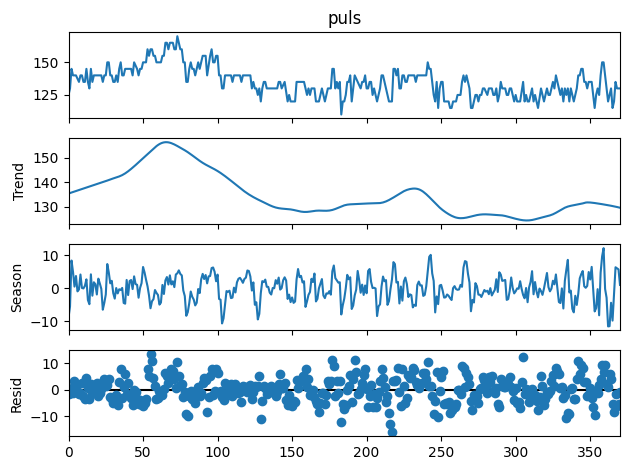

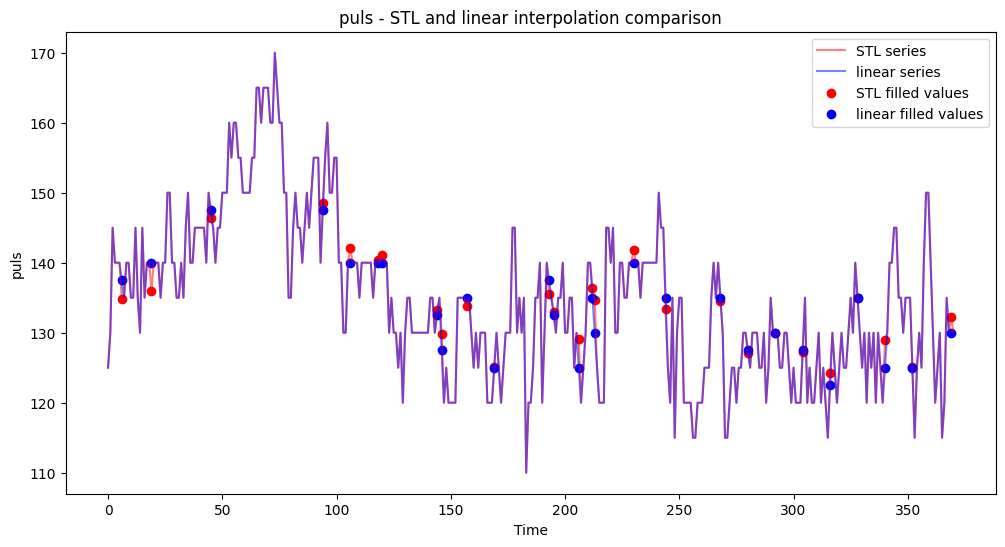

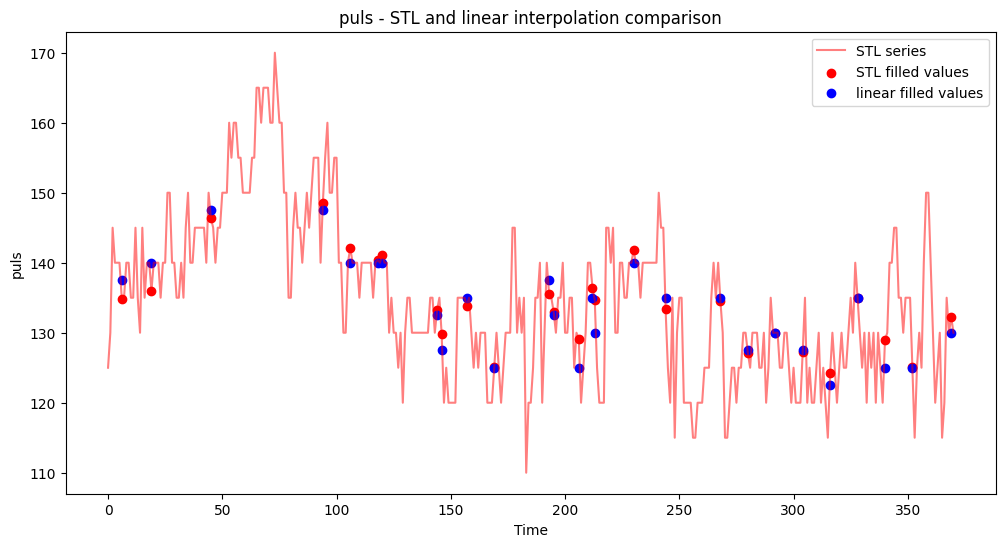

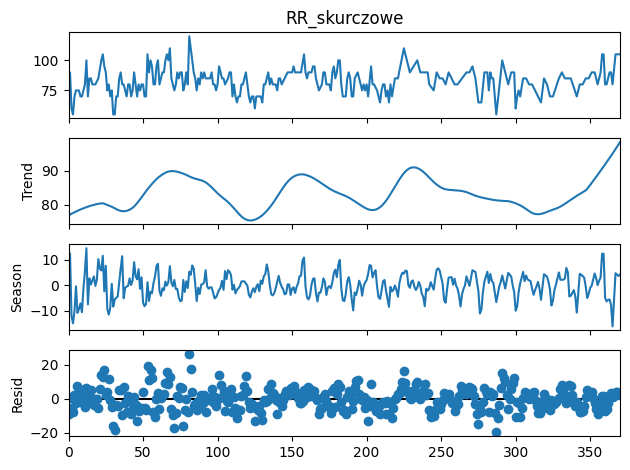

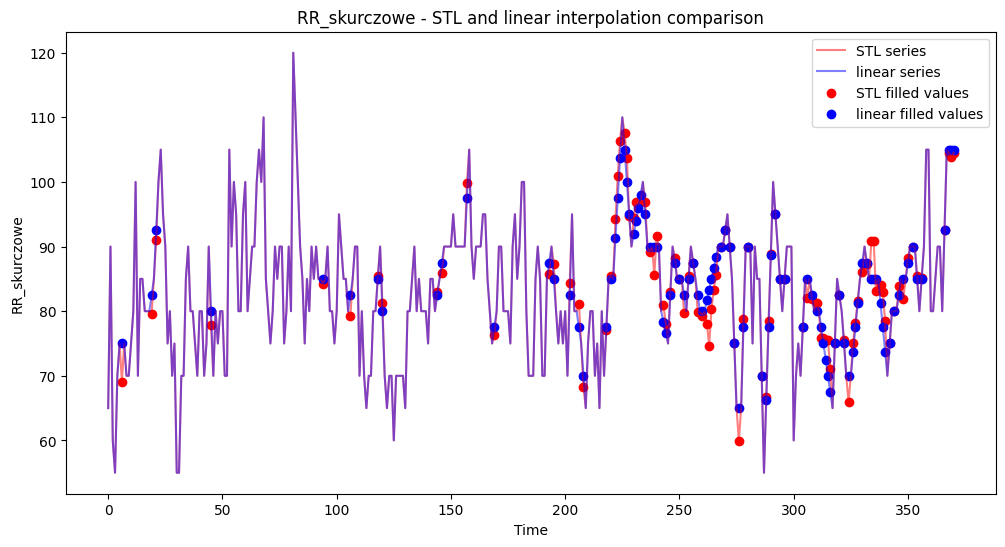

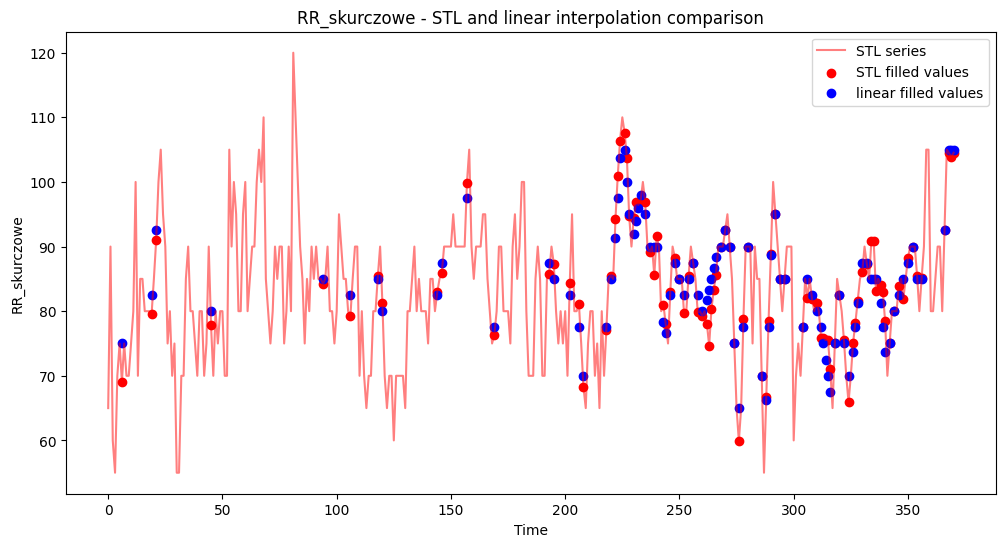

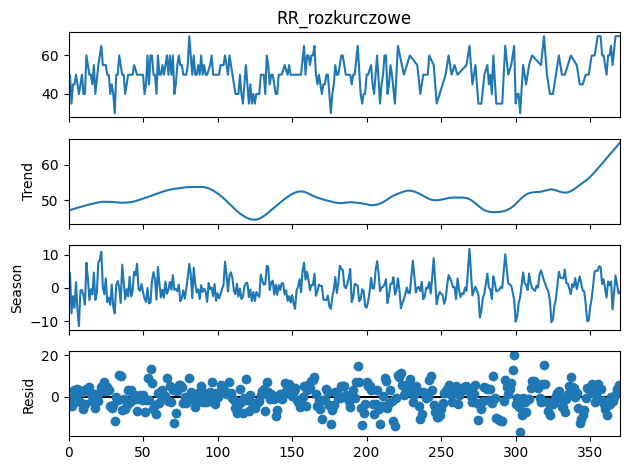

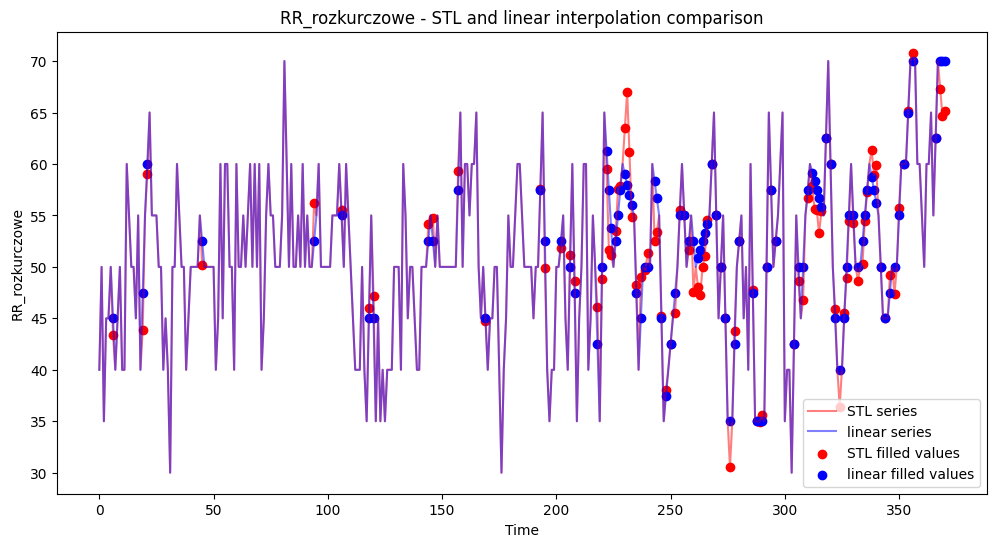

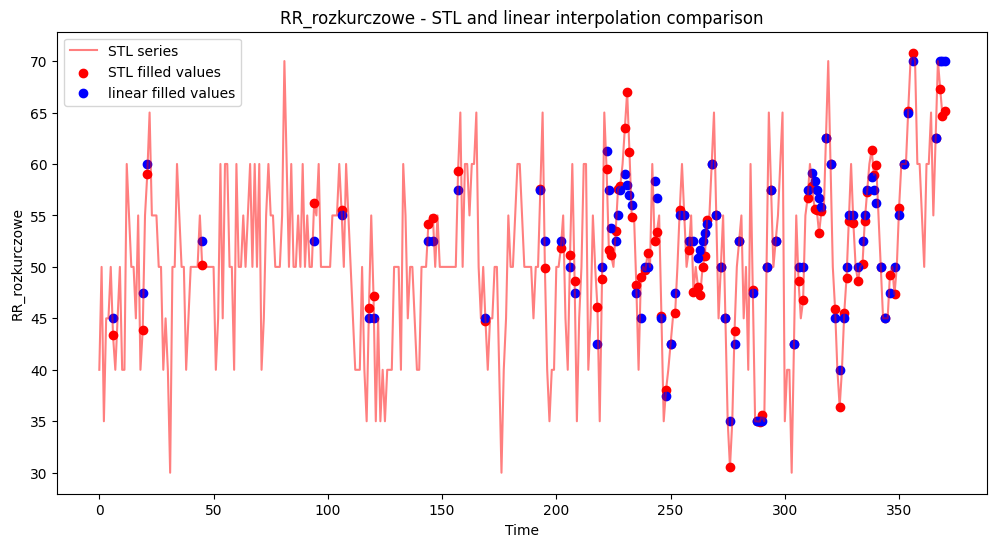

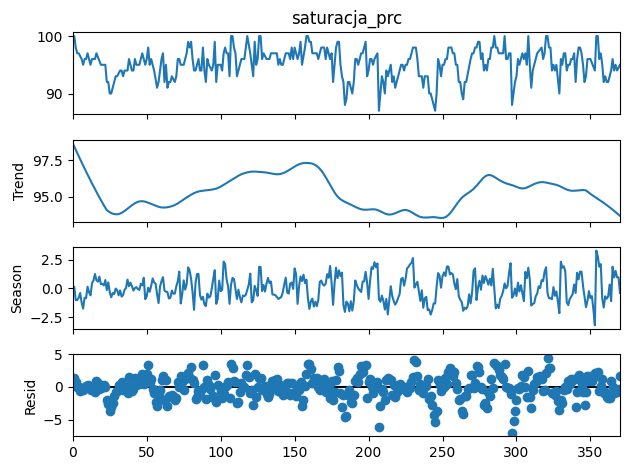

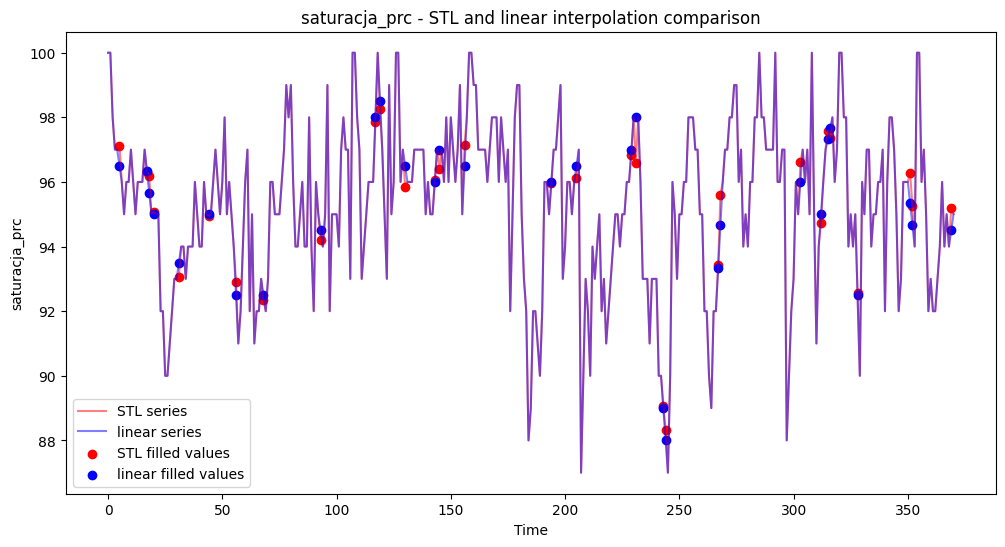

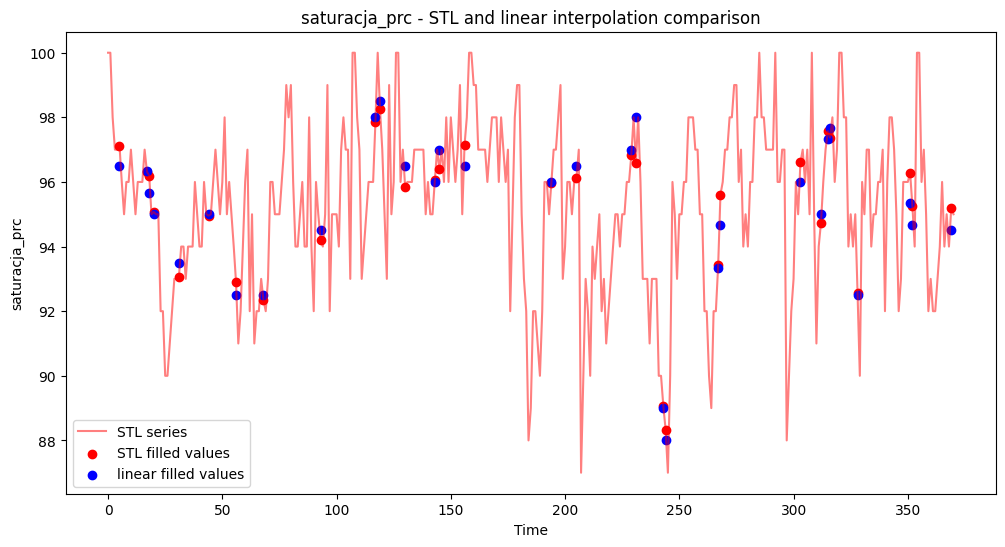

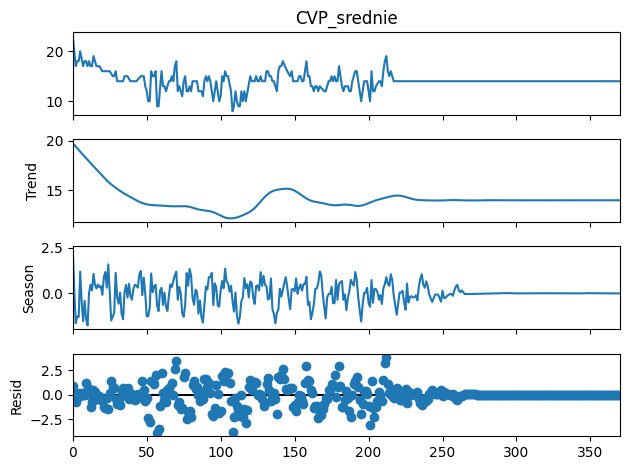

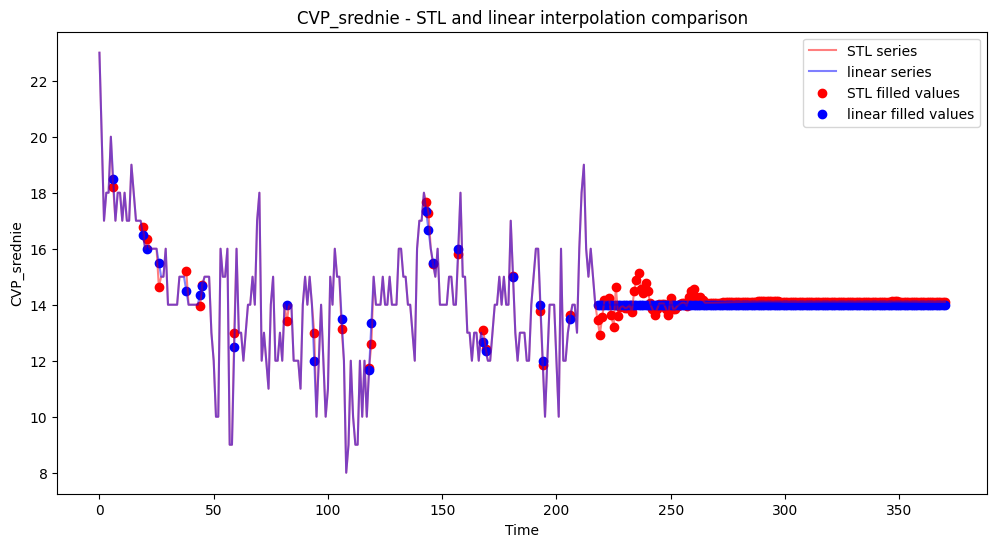

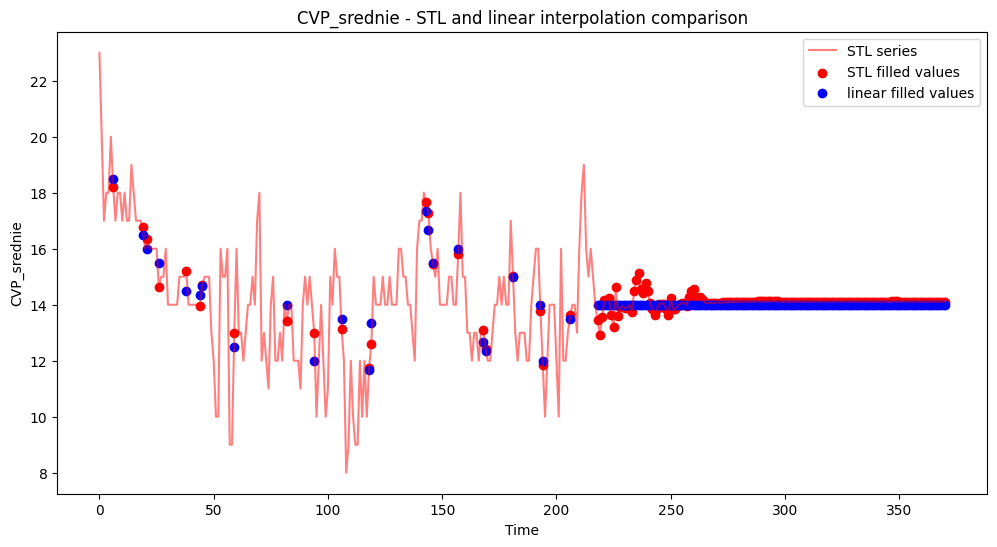

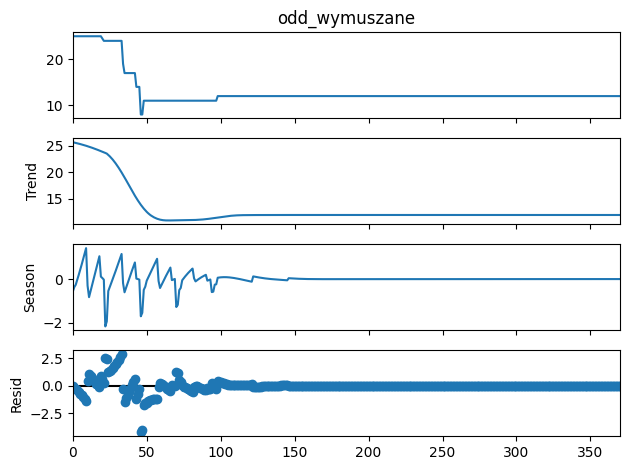

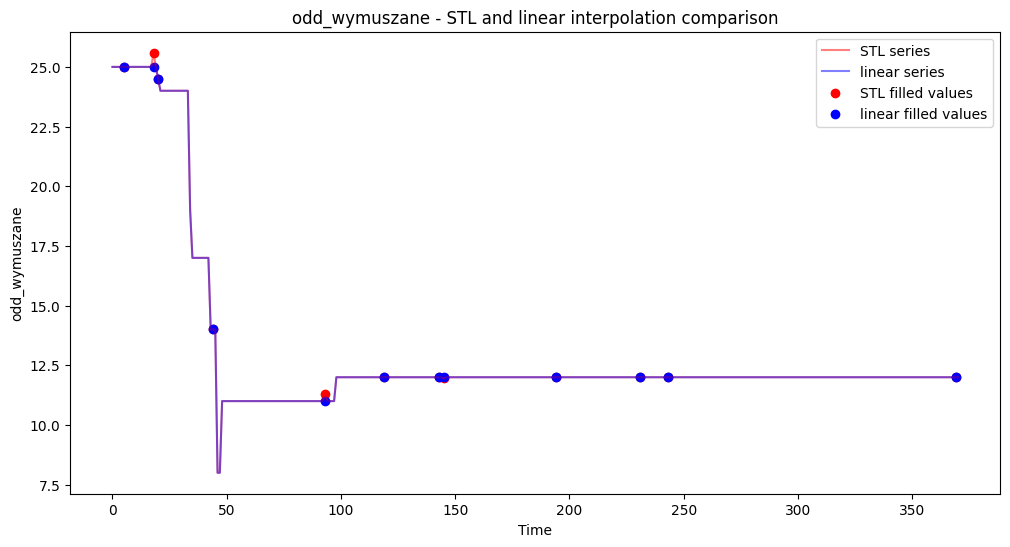

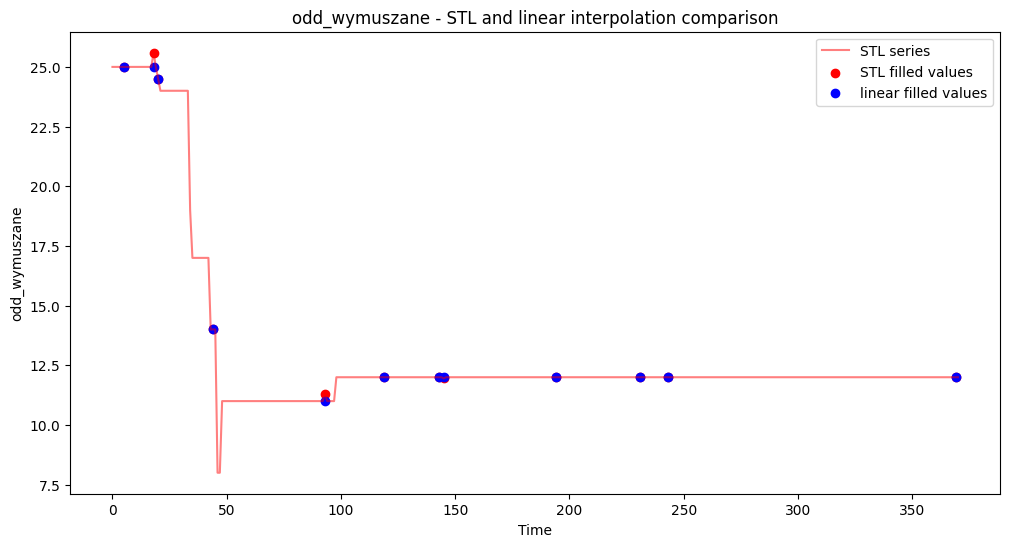

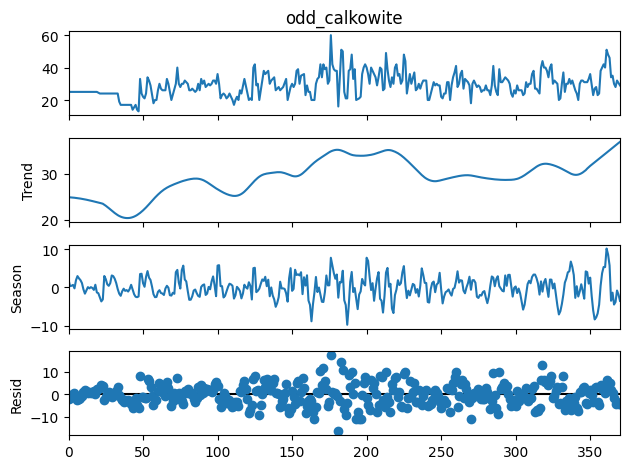

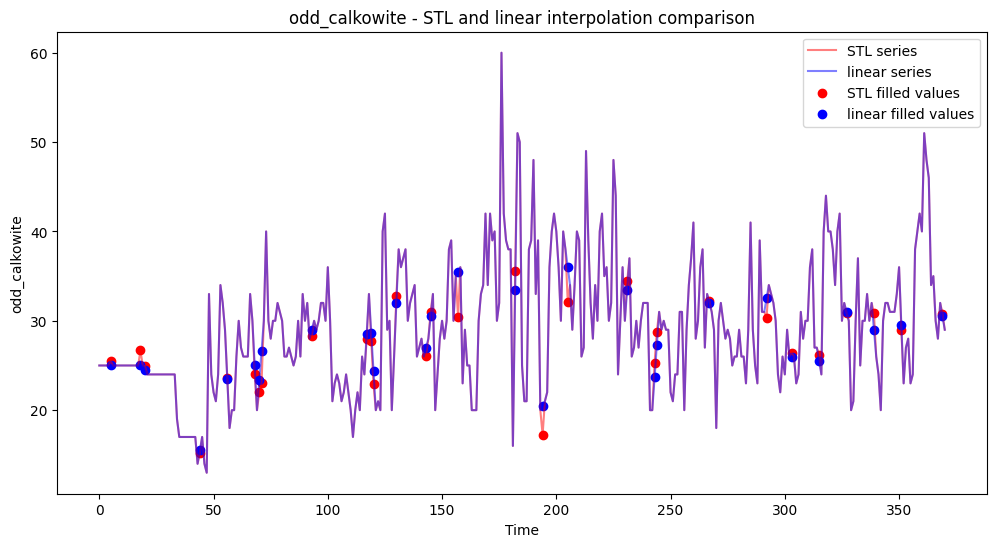

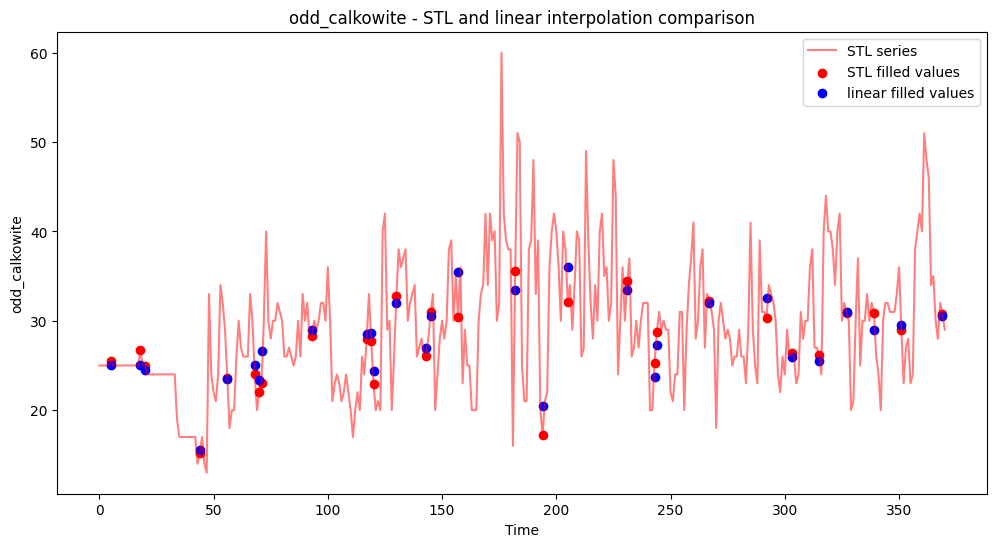

In [85]:
df_stl_int = df.copy()
columns = list(df.columns)
columns.remove('date')

for param in columns:
    dm = DecompositionMonster(param, df_to_interpolate=df_stl_int)
    dm.decompose()
    dm.stl_interpolate()
    dm.comparison_plot_both()
    dm.comparison_plot_stl_only()
    df_stl_int = dm.df_stl_int

In [86]:
# #check wheter only missing values altered
# values_altered = set(df[param][df_lin_int[param] != df[param]].index)
# values_altered == set(missing_values_indieces)